In [1]:
# pip install beautifulsoup4
#https://towardsdatascience.com/a-tutorial-on-scraping-images-from-the-web-using-beautifulsoup-206a7633e948

#https://www.codegrepper.com/code-examples/python/how+to+show+png+image+in+jupyter+notebook

#https://towardsdatascience.com/image-processing-with-python-5b35320a4f3c
# pip install lxml

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
html_page = requests.get('http://127.0.0.1:5500/index.html')
soup = BeautifulSoup(html_page.content, 'html.parser')

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
ls = soup.find_all('img')
img_all = []
for i in range(66):
    name = ls[i].attrs['src']
    img = Image.open(name).convert('RGB')
    arr = np.array(img)
    img_all.append(arr)

In [7]:
np.save('all images', img_all, allow_pickle = True)

In [8]:
import pandas as pd

In [9]:
ls = soup.find_all('h2')
title_all = []
for i in range(66):
    title = str(ls[i])
    tit = title[4:-5]
    title_all.append(tit)
    
df = pd.DataFrame(columns = ['Title'], data = title_all)
df.to_excel('all titles.xlsx', index = False)

In [10]:
img_list = np.load('all images.npy',allow_pickle = True)
tit_list = pd.read_excel('all titles.xlsx') #, index_col = 0, dtype = str, squeeze = True)

News title:  Criminal identified by victims


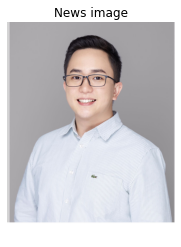

In [11]:
k = 61
print('News title: ', tit_list.loc[k].Title)

plt.imshow(img_list[k])
plt.axis('off')
plt.title('News image')
plt.show()